# Loan Data from Prosper Exploration
## by Kaori Ishikawa

## Preliminary Wrangling

This document explores a datasets containing approximately 114,000 loans data from Prosper, a peer-to-peer lending platform, including loan amount, borrower rate, current loan status and so on.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
df_loan = df.copy()

In [4]:
df_loan.head(1)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258


In [5]:
# Overview of the data shape and composition
print(df_loan.shape)
df_loan.head(5)

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [6]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

There are 113,937 loans in the dataset with 81 features. Most of the variables are numeric in nature, but some should be treated as categorical data (ordinal) such as Prosper Score.


### What is/are the main feature(s) of interest in your dataset?

I'm most intered in figureing out what factors in the dataset affect Borrower APR. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the credit score will have the strongest effect on the loan's outcome. Also, I think that the income ratio of the borrower, ocupation,  
As there are many features, I will focus on these features in each nature of features.
> -Borrower's credit grade : Prosper rating (numeric)<br>
-Borrower's income/asset related data :occupation,  employment status, employment status duration, home owener or not<br>
-Borrower's financial related data : Income, dead to income ratio, delinquencies, public records(last 12 moths), percentage of available revolving credit, revolving credit balance<br>
-Loan detail : listing category, loan original amount, Borrower's APR<br>

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [7]:
# drop some features
keep_col = ['ListingNumber','LoanStatus', 'ProsperRating (numeric)', 'BorrowerAPR','LoanOriginalAmount','ListingCategory (numeric)', 'EmploymentStatus', 'EmploymentStatusDuration',
           'IsBorrowerHomeowner', 'CreditScoreRangeUpper', 'CreditScoreRangeLower','RevolvingCreditBalance', 'BankcardUtilization', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'DebtToIncomeRatio', 'IncomeRange', 'StatedMonthlyIncome']
df_loan = df_loan[keep_col]

In [8]:
df_loan.shape

(113937, 22)

Now I have only 27 columns. Also, this datasets includes 5,018 defaults.

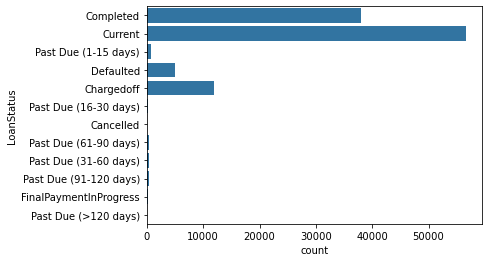

In [9]:
# First off, let's check the loan status just to have an idea.

base_color = sb.color_palette()[0]
sb.countplot(data = df_loan,  y = 'LoanStatus', color = base_color);

Over 50,000 loans are still on going and the completed loans are less than 40,000. Defaulted loans are around 5,000.

Now let's look at credit rating related features. I'd like to check credit score range, but  I am not sure if I should use lower or higher.
To decided this, I will make one more feature and have a closer look.

In [10]:
# make a colmn with the deference between higher and lower score

df_loan['CreditScoreRangeGap'] = df_loan['CreditScoreRangeUpper'] - df_loan['CreditScoreRangeLower']
df_loan['CreditScoreRangeGap'].describe()

count    113346.0
mean         19.0
std           0.0
min          19.0
25%          19.0
50%          19.0
75%          19.0
max          19.0
Name: CreditScoreRangeGap, dtype: float64

If the value is available, the gap is always 19. As there is no large difference between upper and lower score, I will use lower score for the analysis from now on.
And, I will drop CreditScoreRangeUpper column.

In [11]:
# drop credit score range upper and the range gap

df_loan = df_loan.drop(['CreditScoreRangeUpper', 'CreditScoreRangeGap'], axis=1)

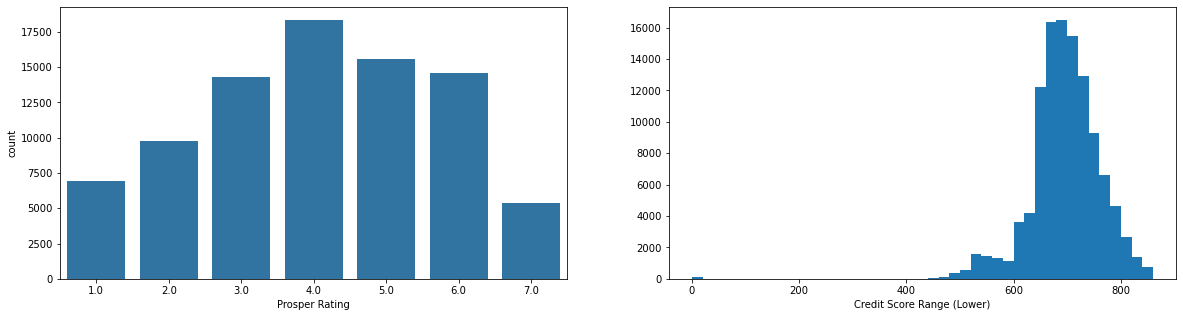

In [12]:
# Next, credit grade

plt.figure(figsize = [20,5])


plt.subplot(1,2,1)
sb.countplot(data = df_loan,  x = 'ProsperRating (numeric)', color = base_color)
plt.xlabel('Prosper Rating');

plt.subplot(1,2,2)
bins_csr = np.arange(0,df_loan.CreditScoreRangeLower.max(), 20 )
plt.hist(data = df_loan,  x = 'CreditScoreRangeLower', color = base_color, bins = bins_csr)
plt.xlabel('Credit Score Range (Lower)');



Prosper rating (0-7) is a unimodal distribution and slightly left-skewed. After the mode of rating of 4, 5 and 6 is only slight decrease followed by a significant drop at 7. Credit score range shows a unimodal distribution with a few sudden increase on the left side. It shows more smooth decline on the right side. Also, there are outliers around 0 and I will have a closer look. 

In [13]:
# Check the outlier
df_loan[df_loan['CreditScoreRangeLower'] < 200].CreditScoreRangeLower.unique()


array([0.])

Given the nature of credit score, 0 should be treated as N/A. I will update the data.

In [14]:
df_loan['CreditScoreRangeLower'] = df_loan['CreditScoreRangeLower'].replace(0, np.nan)

In [15]:
df_loan[df_loan['CreditScoreRangeLower'] < 200]

,ListingNumber,LoanStatus,ProsperRating (numeric),BorrowerAPR,LoanOriginalAmount,ListingCategory (numeric),EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,...,BankcardUtilization,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome


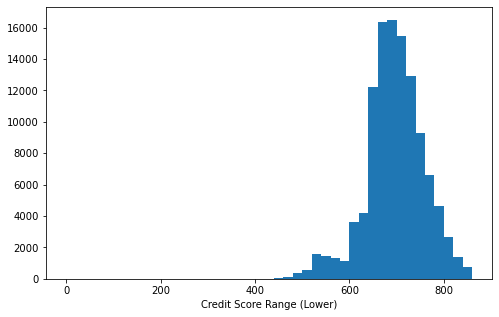

In [16]:
#  re-plot
plt.figure(figsize = [8,5])
plt.hist(data = df_loan,  x = 'CreditScoreRangeLower', color = base_color, bins = bins_csr)
plt.xlabel('Credit Score Range (Lower)');

Now it is cleaned.

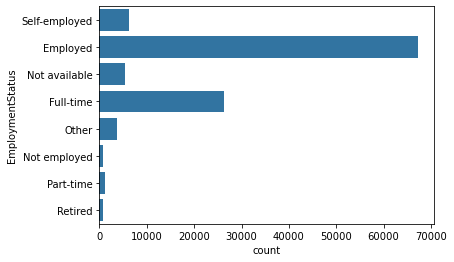

In [18]:
# Next, let's look at employment status
sb.countplot(data = df_loan,  y = 'EmploymentStatus', color = base_color);



In [19]:
df_loan['EmploymentStatus'].unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       nan, 'Not employed', 'Part-time', 'Retired'], dtype=object)

Most of the people in the datasets are employed. I see Full-time and Part-time category are separated from employed. I will include them in emplolyed and also change 'Not available' into Nan.  than the avergage or not.

In [20]:
# update the data
df_loan['EmploymentStatus'] = df_loan['EmploymentStatus'].replace({'Full-time':'Employed', 'Part-time':'Employed'})

In [21]:
# update the data
df_loan['EmploymentStatus'] = df_loan['EmploymentStatus'].replace('Not available', np.NaN)

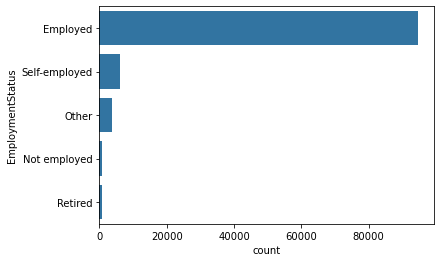

In [22]:
# re-plot
sb.countplot(data = df_loan,  y = 'EmploymentStatus', color = base_color, order = df_loan['EmploymentStatus'].value_counts().index);

Employed are the most frequient status by far.

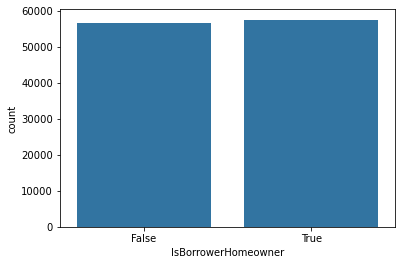

In [23]:
# Next, let's see if borrower is Homeowner or not.
sb.countplot(data = df_loan,  x = 'IsBorrowerHomeowner', color = base_color);


Surprisingly, there is no significant diference at all.

In [24]:
# Next, let's have a look at the income. 
df_loan.IncomeRange.unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

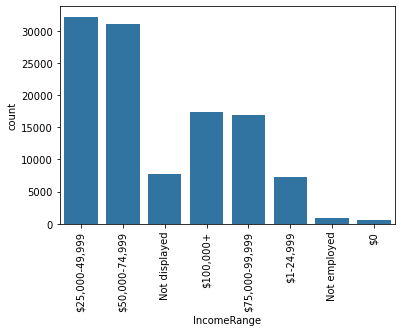

In [25]:
# plot

sb.countplot(data = df_loan, x = 'IncomeRange', color = base_color)
plt.xticks(rotation = 90);

I will include "not eamployed" in $0, and chaneg not displayed into NA.

In [26]:
df_loan['IncomeRange'] = df_loan['IncomeRange'].replace('Not displayed',np.nan)

In [27]:
df_loan['IncomeRange'] = df_loan['IncomeRange'].replace('Not employed','$0')

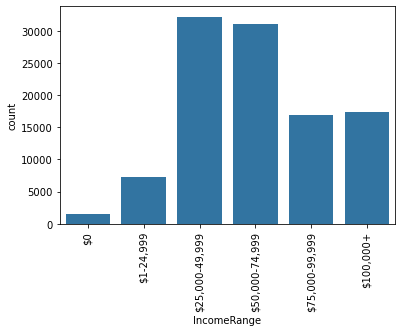

In [28]:
# plot it again
order_inc = ['$0', '$1-24,999', '$25,000-49,999','$50,000-74,999', '$75,000-99,999','$100,000+']
sb.countplot(data = df_loan, x = 'IncomeRange', color = base_color, order = order_inc)
plt.xticks(rotation = 90);

In [29]:
df_loan.StatedMonthlyIncome.describe()

count    1.139370e+05
mean     5.608026e+03
std      7.478497e+03
min      0.000000e+00
25%      3.200333e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

There are much less people with income less than USD 24,999. Also surprisingly, there are so many people with $100,000+. 

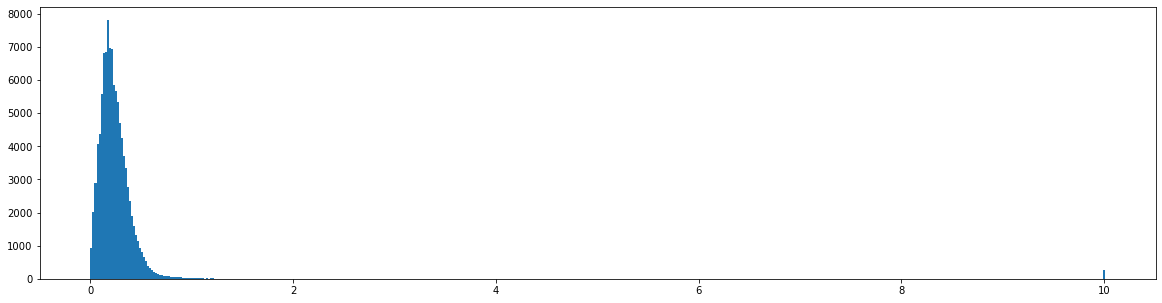

In [30]:
# Next, let's have a look at the debt to income racio
plt.figure(figsize = [20,5])
plt.hist(data = df_loan, x = 'DebtToIncomeRatio', color = base_color, bins = 500);

This initial plot show most of the data to the far left of their axies, suggesting some strong outliers on the right.
Let's take a look to see if they need to be filtered out of the data.

In [31]:
df_loan.DebtToIncomeRatio.describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

Minimum is 0, which I am going to change into N/A later given the nature of the feature.

In [32]:
# Select high outliers, using criteria eyeballed from the plot.

outliers = (df_loan['DebtToIncomeRatio'] > 1.5)
print(outliers.sum())
df_loan.loc[outliers, :]

555


,ListingNumber,LoanStatus,ProsperRating (numeric),BorrowerAPR,LoanOriginalAmount,ListingCategory (numeric),EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,...,BankcardUtilization,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome
22,706927,Current,1.0,0.35356,4000,1,Other,68.0,False,700.0,...,0.40,0.0,0.0,0.0,1.0,0.0,10050.0,9.20,"$1-24,999",118.333333
226,104542,Completed,NaN,0.11749,1000,0,Employed,9.0,True,600.0,...,0.61,0.0,0.0,0.0,0.0,0.0,152934.0,10.01,NaN,0.083333
368,128819,Completed,NaN,0.20735,16000,0,Employed,7.0,False,660.0,...,0.56,0.0,0.0,0.0,0.0,0.0,9398.0,1.65,"$1-24,999",1083.333333
576,124494,Completed,NaN,0.10505,1500,0,Retired,65.0,False,800.0,...,0.04,0.0,0.0,0.0,0.0,0.0,1772.0,10.01,"$1-24,999",0.083333
626,560943,Current,1.0,0.35797,2000,1,Employed,51.0,False,700.0,...,0.47,1.0,378.0,0.0,0.0,0.0,4445.0,10.01,"$1-24,999",3.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113258,627138,Defaulted,4.0,0.27554,4000,2,Employed,172.0,True,780.0,...,0.58,0.0,0.0,9.0,0.0,0.0,10742.0,10.01,"$1-24,999",2.916667
113367,827764,Completed,1.0,0.35356,2000,13,Other,20.0,True,660.0,...,0.64,0.0,0.0,0.0,0.0,0.0,8988.0,2.53,"$1-24,999",500.000000
113387,485381,Completed,1.0,0.39153,1500,7,Employed,45.0,True,720.0,...,0.06,0.0,0.0,14.0,1.0,0.0,1447.0,2.38,"$25,000-49,999",4000.000000
113407,274103,Completed,NaN,0.25163,1386,4,Employed,25.0,True,640.0,...,0.37,0.0,0.0,2.0,0.0,0.0,725.0,2.16,"$1-24,999",233.333333


I see some stated monthly income of 0.083333. I will have a closer look

In [33]:
df_loan[df_loan.StatedMonthlyIncome < 1 ].StatedMonthlyIncome.unique()

array([0.      , 0.083333, 0.833333, 0.25    ])

In [34]:
# filter the monthly income which is between 0 and 1
df_loan[(0 < df_loan.StatedMonthlyIncome) & (df_loan.StatedMonthlyIncome < 1) ]

,ListingNumber,LoanStatus,ProsperRating (numeric),BorrowerAPR,LoanOriginalAmount,ListingCategory (numeric),EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,...,BankcardUtilization,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome
146,31745,Completed,NaN,0.09939,4000,0,NaN,NaN,False,740.0,...,NaN,0.0,NaN,0.0,0.0,NaN,NaN,0.07,NaN,0.083333
226,104542,Completed,NaN,0.11749,1000,0,Employed,9.0,True,600.0,...,0.61,0.0,0.0,0.0,0.0,0.0,152934.0,10.01,NaN,0.083333
576,124494,Completed,NaN,0.10505,1500,0,Retired,65.0,False,800.0,...,0.04,0.0,0.0,0.0,0.0,0.0,1772.0,10.01,"$1-24,999",0.083333
1242,146341,Completed,NaN,0.11415,3000,0,Not employed,8.0,False,740.0,...,0.21,0.0,0.0,0.0,0.0,0.0,5932.0,10.01,$0,0.083333
1925,139992,Defaulted,NaN,0.08684,3000,0,Not employed,0.0,False,740.0,...,0.10,0.0,0.0,0.0,0.0,0.0,2169.0,10.01,$0,0.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111321,282635,Completed,NaN,0.17445,10000,3,Self-employed,51.0,True,720.0,...,0.21,0.0,0.0,0.0,0.0,0.0,10180.0,10.01,"$1-24,999",0.083333
111877,108138,Defaulted,NaN,0.29049,5000,0,Self-employed,128.0,True,520.0,...,0.71,9.0,6204.0,0.0,0.0,0.0,23551.0,10.01,NaN,0.083333
112308,105214,Completed,NaN,0.16516,6001,0,Self-employed,8.0,True,720.0,...,0.00,1.0,850.0,3.0,0.0,0.0,1400.0,10.01,"$1-24,999",0.083333
112712,266982,Chargedoff,NaN,0.25517,2850,3,Employed,13.0,False,620.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,10.01,"$1-24,999",0.083333


I will change debt to income ratio into NA where monthly income is 0.083333 and 0.

In [35]:
df_loan.loc[((pd.isnull(df_loan['IncomeRange'])) & (df_loan['StatedMonthlyIncome'].isin([0.00, 0.083333]))),'DebtToIncomeRatio']  = np.NaN

In [36]:
# test 
df_loan.loc[((pd.isnull(df_loan['IncomeRange'])) & (df_loan['StatedMonthlyIncome'].isin([0.00, 0.083333]))),'DebtToIncomeRatio'].sum()

0.0

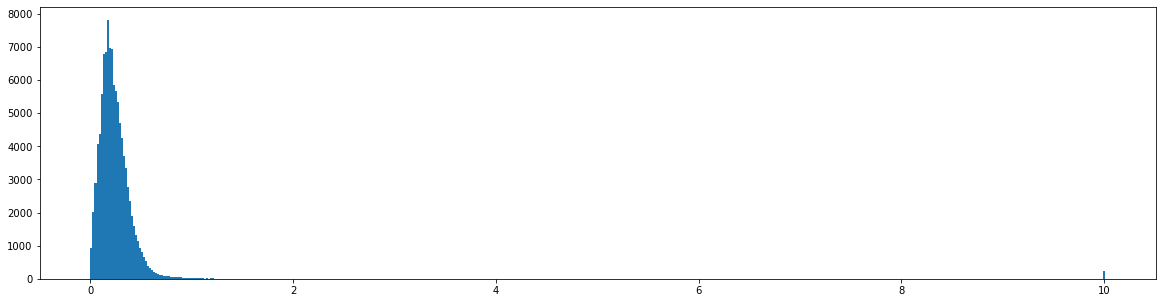

In [37]:
# replot
plt.figure(figsize = [20,5])
plt.hist(data = df_loan, x = 'DebtToIncomeRatio', color = base_color, bins = 500);

It is unimordal and the curve on the right side looks more smooth. Let's also zoom in to the data with the deabt to income ration lower than 1.5.

In [48]:
df_loan.loc[df_loan.DebtToIncomeRatio > 2, 'DebtToIncomeRatio'] = np.NaN

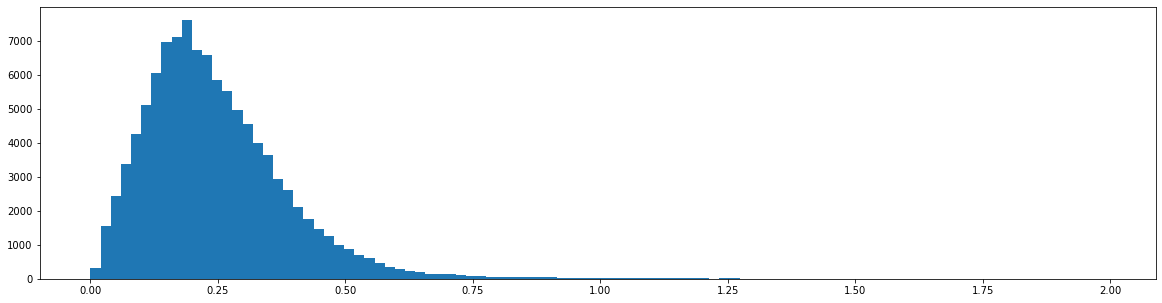

In [49]:
# plot the histgram forcused to the data whose debt to income ratio is lower than 1.5
plt.figure(figsize = [20,5])
plt.hist(data = df_loan, x = 'DebtToIncomeRatio', color = base_color, bins = 100);

It is slightly right skewed.

Let's still plot stated monthly income as well.

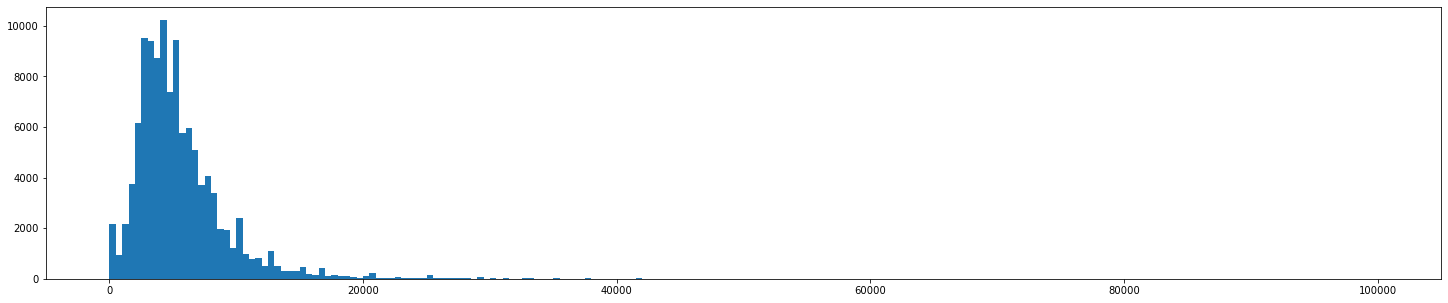

In [50]:
# plot the monthly income of outliers
plt.figure(figsize = [25,5])
plt.hist(data = df_loan, x = 'StatedMonthlyIncome', bins = 200);


It looks there are strong outlier on the right side. Let's have a closer look.

In [51]:
# check the outlier 
df_loan.loc[df_loan['StatedMonthlyIncome'] > 100000, 'StatedMonthlyIncome'] = np.NaN

Data seems not suspecious.

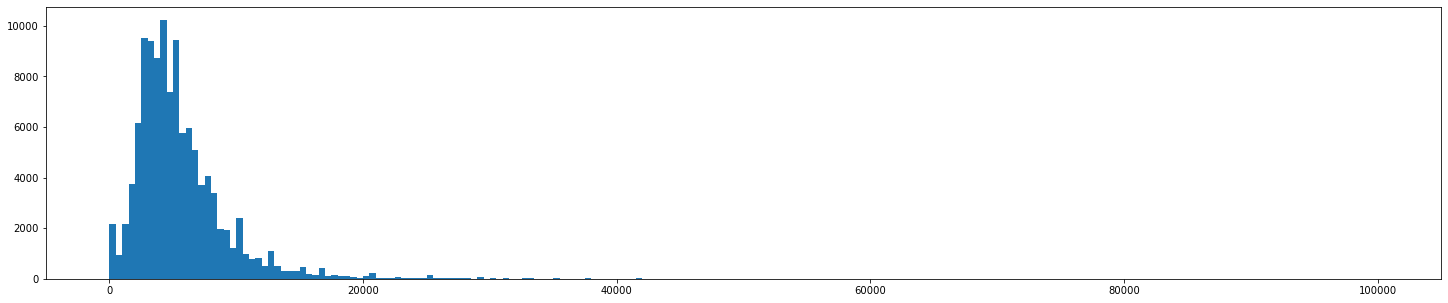

In [52]:
plt.figure(figsize = [25,5])
plt.hist(data = df_loan, x = 'StatedMonthlyIncome', bins = 200);

In [53]:
#check contents 

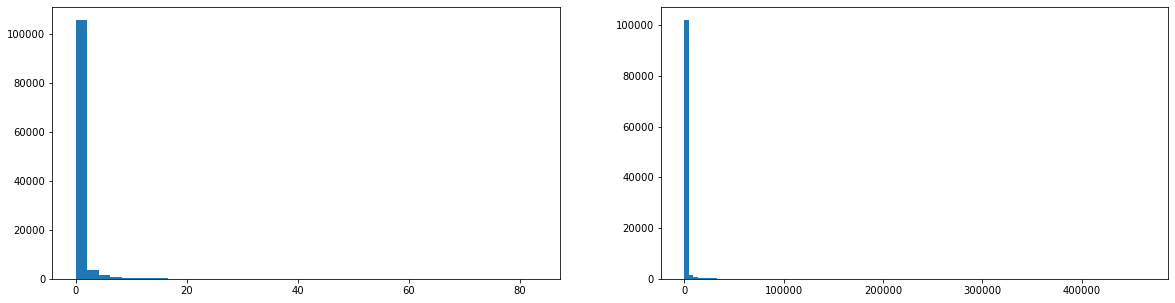

In [54]:
# Now let's check the Delinquencies
plt.figure(figsize = [20,5])

plt.subplot(1,2,1)
plt.hist(data = df_loan, x = 'CurrentDelinquencies', bins = 40);

plt.subplot(1,2,2)
plt.hist(data = df_loan, x = 'AmountDelinquent', bins = 100 );

This initial plot show most of the data to the far left of their axies, suggesting some strong outliers on the right. Let's take a look to see if they need to be filtered out of the data.

In [55]:
df_loan.loc[df_loan.CurrentDelinquencies > 20]

,ListingNumber,LoanStatus,ProsperRating (numeric),BorrowerAPR,LoanOriginalAmount,ListingCategory (numeric),EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,...,BankcardUtilization,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome
535,77938,Defaulted,NaN,0.24658,1700,0,NaN,NaN,False,500.0,...,NaN,22.0,NaN,0.0,0.0,NaN,NaN,0.03,NaN,2583.333333
1101,75961,Chargedoff,NaN,0.30911,1000,0,NaN,NaN,True,560.0,...,NaN,21.0,NaN,26.0,0.0,NaN,NaN,0.38,NaN,3333.333333
1799,377867,Chargedoff,NaN,0.37453,2780,1,Employed,8.0,False,520.0,...,0.00,22.0,15995.0,4.0,5.0,0.0,0.0,0.06,"$1-24,999",2000.000000
2259,285543,Chargedoff,NaN,0.37453,1000,7,Employed,35.0,False,520.0,...,0.00,25.0,29183.0,44.0,1.0,0.0,0.0,0.08,"$1-24,999",1300.833333
5464,84989,Chargedoff,NaN,0.24451,2771,0,NaN,NaN,True,540.0,...,NaN,21.0,NaN,30.0,0.0,NaN,NaN,0.19,NaN,3000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109208,1088540,Current,5.0,0.17611,15000,1,Other,0.0,True,700.0,...,0.29,51.0,8918.0,0.0,0.0,0.0,10715.0,0.39,"$50,000-74,999",5000.000000
109718,123482,Chargedoff,NaN,0.23547,15000,0,Employed,3.0,True,600.0,...,0.00,23.0,63558.0,84.0,0.0,0.0,0.0,0.56,"$25,000-49,999",2058.333333
110425,69974,Completed,NaN,0.23174,1525,0,NaN,NaN,False,500.0,...,NaN,24.0,NaN,30.0,0.0,NaN,NaN,0.02,NaN,3583.333333
111561,56232,Defaulted,NaN,0.24800,1050,0,NaN,NaN,False,520.0,...,NaN,28.0,NaN,0.0,1.0,NaN,NaN,0.26,NaN,2000.000000


In [56]:
df_loan.loc[df_loan.CurrentDelinquencies > 20, ].LoanStatus.value_counts()

Chargedoff               52
Defaulted                44
Completed                33
Current                   3
Past Due (31-60 days)     1
Past Due (16-30 days)     1
Name: LoanStatus, dtype: int64

Those outlier has high Chargedoff/Defaulted chance. Therefore, I will keep it for the further analysis.

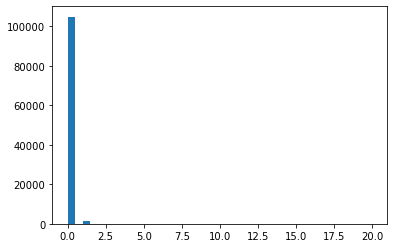

In [57]:
# Now public record.

plt.hist(data = df_loan, x = 'PublicRecordsLast12Months', bins = 40);

In [58]:
df_loan.PublicRecordsLast12Months.value_counts()

0.0     104941
1.0       1255
2.0         96
3.0         28
4.0         10
7.0          2
20.0         1
Name: PublicRecordsLast12Months, dtype: int64

Most of the people has 0 public records.

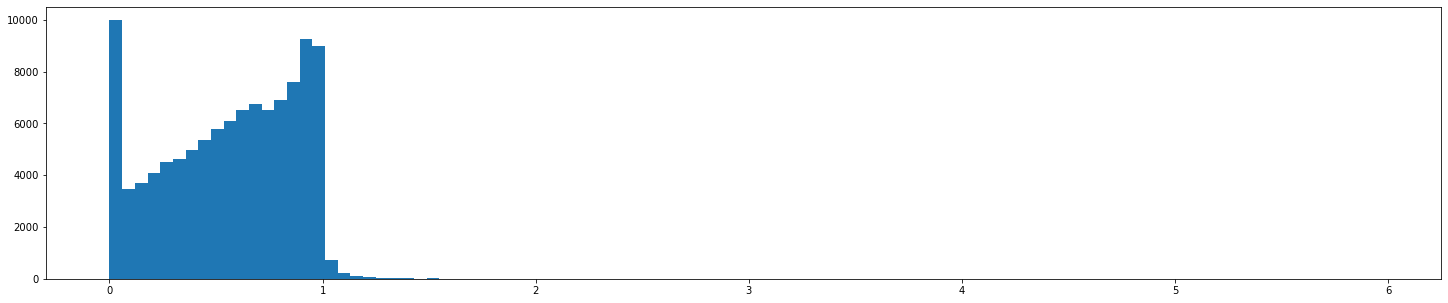

In [59]:
# Let's look at the revolving 
plt.figure(figsize = [25,5])
plt.hist(data = df_loan, x = 'BankcardUtilization', bins = 100);

This feature can be over 100%. While 0 is the highest frequency but the rest has a slight upwords trends towards 100%. And this graph shows there are strong outligher on the right side.

In [60]:
df_loan[df_loan['BankcardUtilization']>1]

,ListingNumber,LoanStatus,ProsperRating (numeric),BorrowerAPR,LoanOriginalAmount,ListingCategory (numeric),EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,...,BankcardUtilization,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome
127,292860,Chargedoff,NaN,0.29743,2551,1,Employed,47.0,False,520.0,...,1.31,1.0,30.0,5.0,0.0,0.0,1051.0,0.17,"$25,000-49,999",2946.666667
212,573511,Current,1.0,0.35797,4000,7,Employed,56.0,True,660.0,...,1.04,0.0,0.0,5.0,1.0,0.0,6472.0,0.26,"$25,000-49,999",3708.333333
302,460728,Chargedoff,3.0,0.28574,2500,1,Employed,23.0,False,640.0,...,1.01,0.0,0.0,0.0,0.0,0.0,3228.0,0.10,"$50,000-74,999",4183.333333
367,312524,Completed,NaN,0.30704,1545,4,Employed,13.0,False,560.0,...,1.01,0.0,0.0,0.0,0.0,0.0,4050.0,0.49,"$1-24,999",1583.333333
397,758046,Chargedoff,2.0,0.32393,4000,15,Employed,98.0,False,620.0,...,1.03,11.0,18536.0,21.0,0.0,0.0,3511.0,0.11,"$50,000-74,999",4166.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113692,250328,Chargedoff,NaN,0.36623,2100,1,Not employed,26.0,True,580.0,...,1.02,0.0,0.0,2.0,1.0,0.0,2513.0,0.33,$0,1289.000000
113704,380216,Completed,NaN,0.05104,16000,6,Employed,6.0,False,620.0,...,1.10,0.0,0.0,7.0,0.0,0.0,550.0,NaN,"$1-24,999",1000.000000
113846,536612,Completed,2.0,0.35132,7000,1,Employed,87.0,True,680.0,...,1.02,0.0,0.0,20.0,1.0,0.0,4093.0,0.18,"$25,000-49,999",3750.000000
113859,279674,Completed,NaN,0.23635,3000,1,Employed,6.0,False,560.0,...,1.04,0.0,0.0,0.0,0.0,0.0,9418.0,0.11,"$50,000-74,999",4333.333333


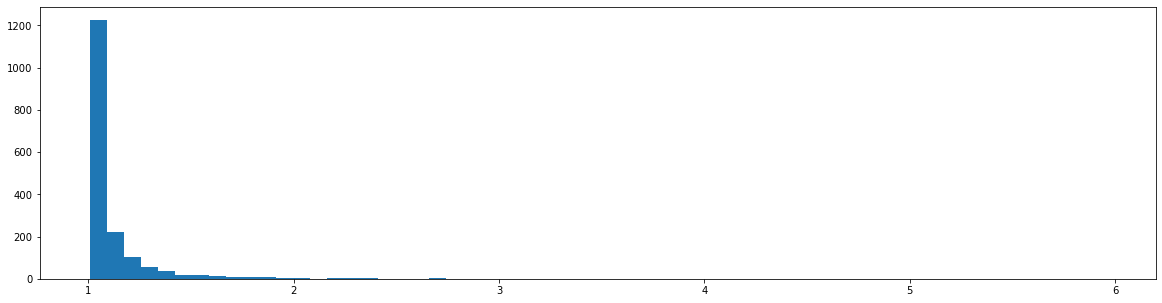

In [61]:
# Let's zoom in to the data higher than 1
plt.figure(figsize = [20,5])


plt.hist(data = df_loan[df_loan['BankcardUtilization']>1], x = 'BankcardUtilization', bins = 60);


In [62]:
df_loan[df_loan['BankcardUtilization']>3].BankcardUtilization

5031     4.73
26151    5.95
67184    3.47
71777    5.83
Name: BankcardUtilization, dtype: float64

The above 4 are the extreme outliers.

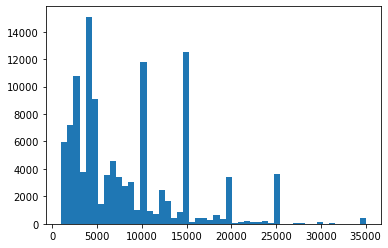

In [63]:
# now lets looke at the original loan amount

plt.hist(data = df_loan, x = 'LoanOriginalAmount', bins = 50);

This shows multiple peak, and loan amount tends to be around nice round number.

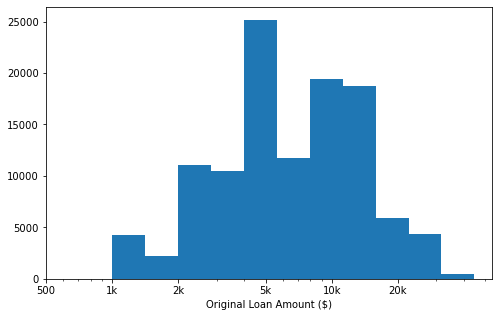

In [64]:
# There is a long tail in the distribution, so let's put it on a log scale instead.
log_binsize = 0.15
bins = 10**np.arange(3, np.log10(df_loan.LoanOriginalAmount.max()) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loan, x = 'LoanOriginalAmount', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.xlabel('Original Loan Amount ($)')
plt.show()


This looks bimodal. 

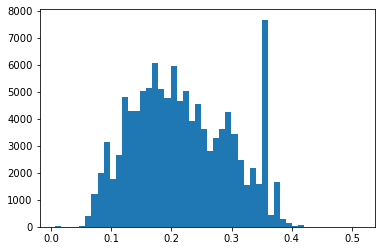

In [65]:
# Now Borrower's rate
plt.hist(data = df_loan, x = 'BorrowerAPR', bins = 50);

This is bimodal,

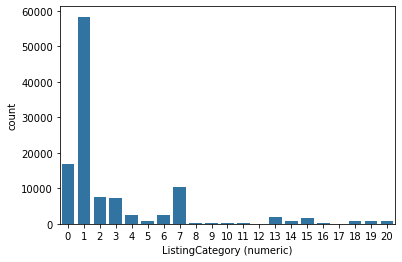

In [66]:
# now recommendations,
sb.countplot(data = df_loan, x = 'ListingCategory (numeric)', color = base_color);

In [67]:
df_loan['ListingCategory (numeric)'].value_counts(sort =  False)

0     16965
1     58308
2      7433
3      7189
4      2395
5       756
6      2572
7     10494
8       199
9        85
10       91
11      217
12       59
13     1996
14      876
15     1522
16      304
17       52
18      885
19      768
20      771
Name: ListingCategory (numeric), dtype: int64

Category details are as follows.
>0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

Debt consolidation is the most frequent category.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Original loan amounts had a large range of values, and I looked at the data using a log transform. Under the transformation, it looks 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Changed data of 

## Bivariate Exploration

First off, I'd like to look at the pairwise correlations in the data.

In [68]:
numeric_vars = ['BorrowerAPR','CreditScoreRangeLower', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 'CurrentDelinquencies', 'AmountDelinquent', 'PublicRecordsLast12Months', 
                'LoanOriginalAmount']
categoric_vars = ['LoanStatus', 'ProsperRating (numeric)', 'EmploymentStatus','Occupation', 'IsBorrowerHomeowner', 'IncomeRange', 'ListingCategory (numeric)']

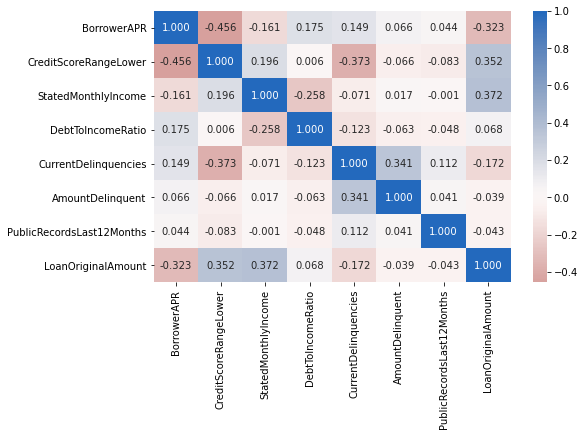

In [69]:
plt.figure(figsize = [8,5])
sb.heatmap(df_loan[numeric_vars].corr(), annot= True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show()

Surprisingly, borrower APR has strong negative correlation with credits score. 
APR has also strong negative correlation with original loan amount, which make sence as the amount goes lower, the actual amount of interest goes higher as well.

In [70]:
numeric_vars = ['BorrowerAPR','CreditScoreRangeLower', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 'CurrentDelinquencies', 'AmountDelinquent', 'PublicRecordsLast12Months', 
                'LoanOriginalAmount']
categoric_vars = ['LoanStatus', 'ProsperRating (numeric)', 'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeRange', 'ListingCategory (numeric)']

C:\Users\Kaori\anaconda3\lib\site-packages\seaborn\axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


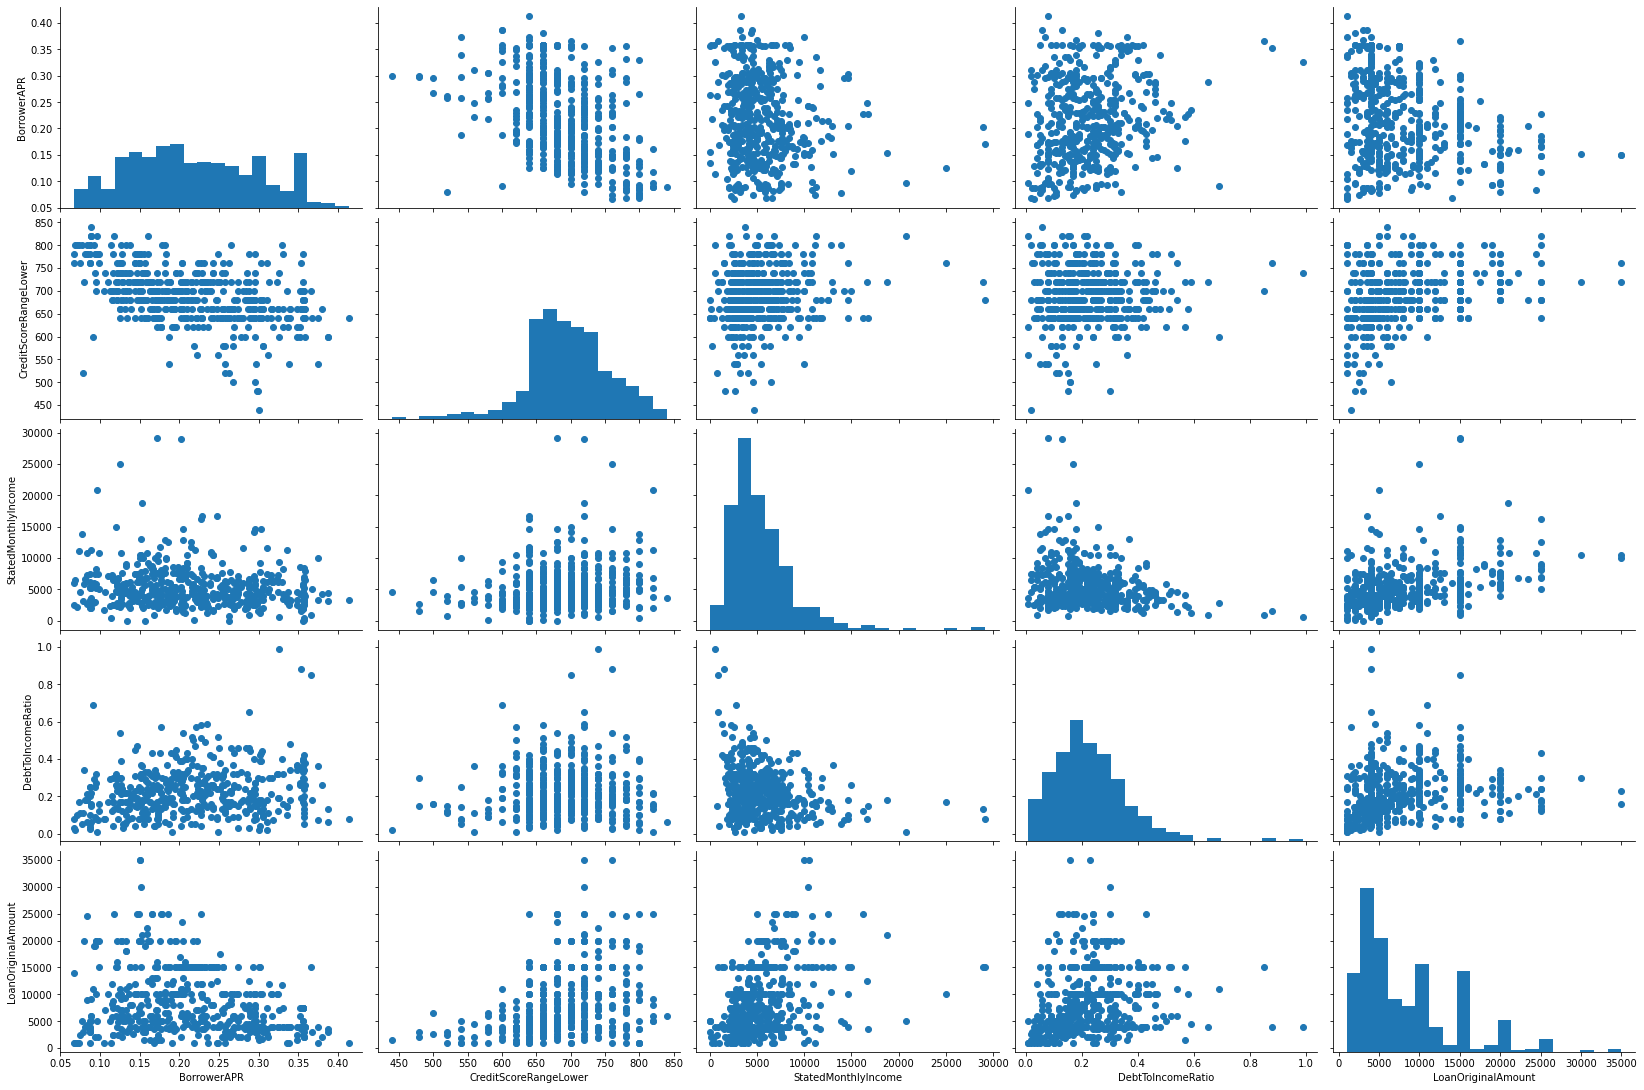

In [71]:
# plot matrix of features of my interest : sample 500 loans so that plots are clearer and they render faster
df_loan_samp500 = df_loan.sample(500)

g = sb.PairGrid(data = df_loan_samp500, vars = ['BorrowerAPR','CreditScoreRangeLower', 'StatedMonthlyIncome', 'DebtToIncomeRatio',  
                'LoanOriginalAmount'], size = 3, aspect = 1.5)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

As expected, the 'x', 'y', and 'z' dimensions are all highly correlated with one another, and all of them are also highly correlated with carat. Since carat is a measure of diamond size, it's not too surprising that the overall trend between carat and the three individual dimensions appears polynomial. In addition, since all the diamonds are round-cut, it makes sense that the 'x', 'y', and 'z' sizes would all move proportionally together.

Surprisingly, the correlation coefficient between price and carat is very high, despite the fact that price has such a large range of values. This will be worth extra exploration in this section. Depth and table don't have strong correlations with any other numeric variables in the dataset, and we see the moderate negative correlation hypothesized in the previous section. I won't perform any further analyses with these variables since they don't look like they'll be of much further interest.

Let's move on to looking at how price and carat weight correlate with the categorical variables.

In [92]:
n_loan_vars = ['BorrowerAPR', 'LoanOriginalAmount', 'DebtToIncomeRatio']
n_fin_vars = ['CreditScoreRangeLower', 'StatedMonthlyIncome', ]
n_add_vars = ['CurrentDelinquencies','AmountDelinquent', 'PublicRecordsLast12Months']
c_loan_vars = ['LoanStatus', 'ListingCategory (numeric)']
c_fin_vars = ['ProsperRating (numeric)', 'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeRange']

<Figure size 2160x1080 with 0 Axes>

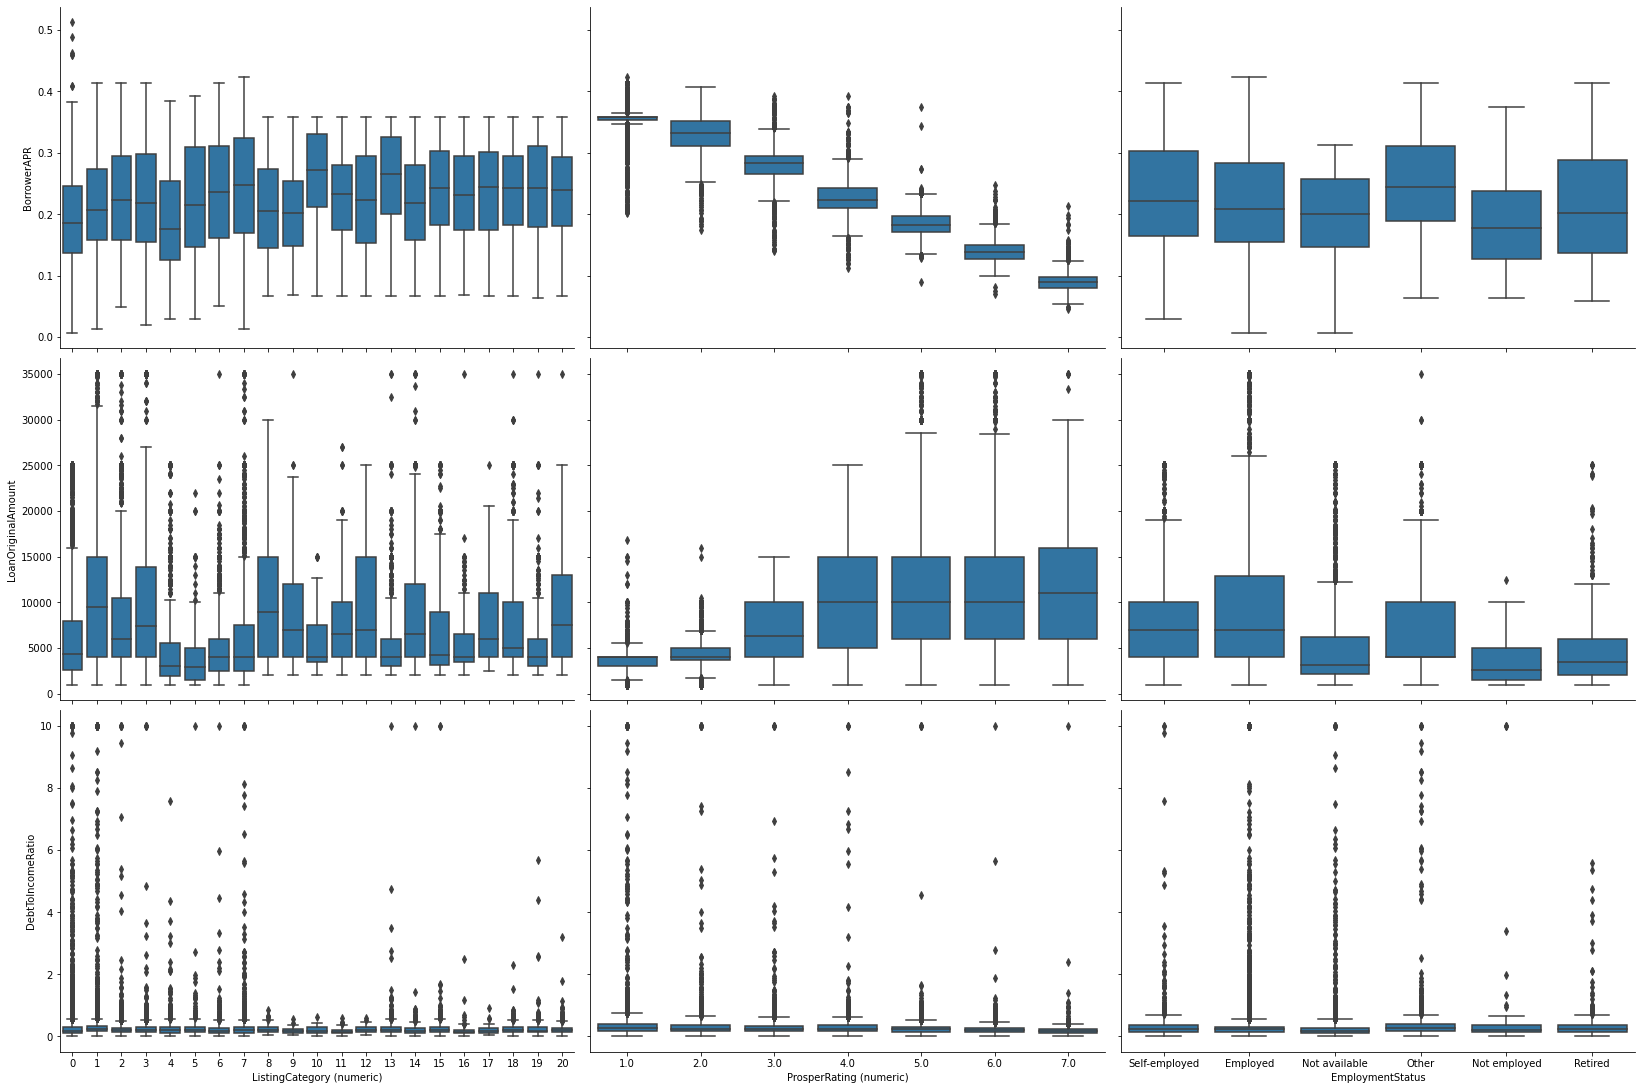

In [93]:
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [30, 15])
g = sb.PairGrid(data = df_loan, y_vars = n_loan_vars, x_vars = ['ListingCategory (numeric)', 'ProsperRating (numeric)', 'EmploymentStatus'],
                height = 5, aspect = 1.5)

g.map(boxgrid)
plt.show();

Firstly, category 1(Debt Consolidation),3(Business) and 14(Large Purchases)have higher median and Q3 of loan amount compared to others. 
Also, 10(Cosmetic Procedure) and 13(Household Expenses) have slightly higher APR. And Q1 and Q4 of 8-20 are all surprisingly matching. 0-7 has spread wider than 8-20. Debt to income ratio has a lot of higher outliers. 

Secondly, in terms of Prosper rating, lower rate tends to have more higher outlier in debt to income ratio. And, Prosper rating looks positive correlation with Prosper rating, although 5-7 doesn't show significant difference. On the other hand, it shows negative correlation with APR.

Thirdly, not employed people has high debt to income ratio, which is understandable. And, employed people has higher amount of original loan compared to the others. In terms of the loan amount, employed people has the highest 4Q, but the median is around the same with self-employed people. Not employed and retired people has low rate.　Also, not employed people has slightly higher APR rate.

<Figure size 1440x720 with 0 Axes>

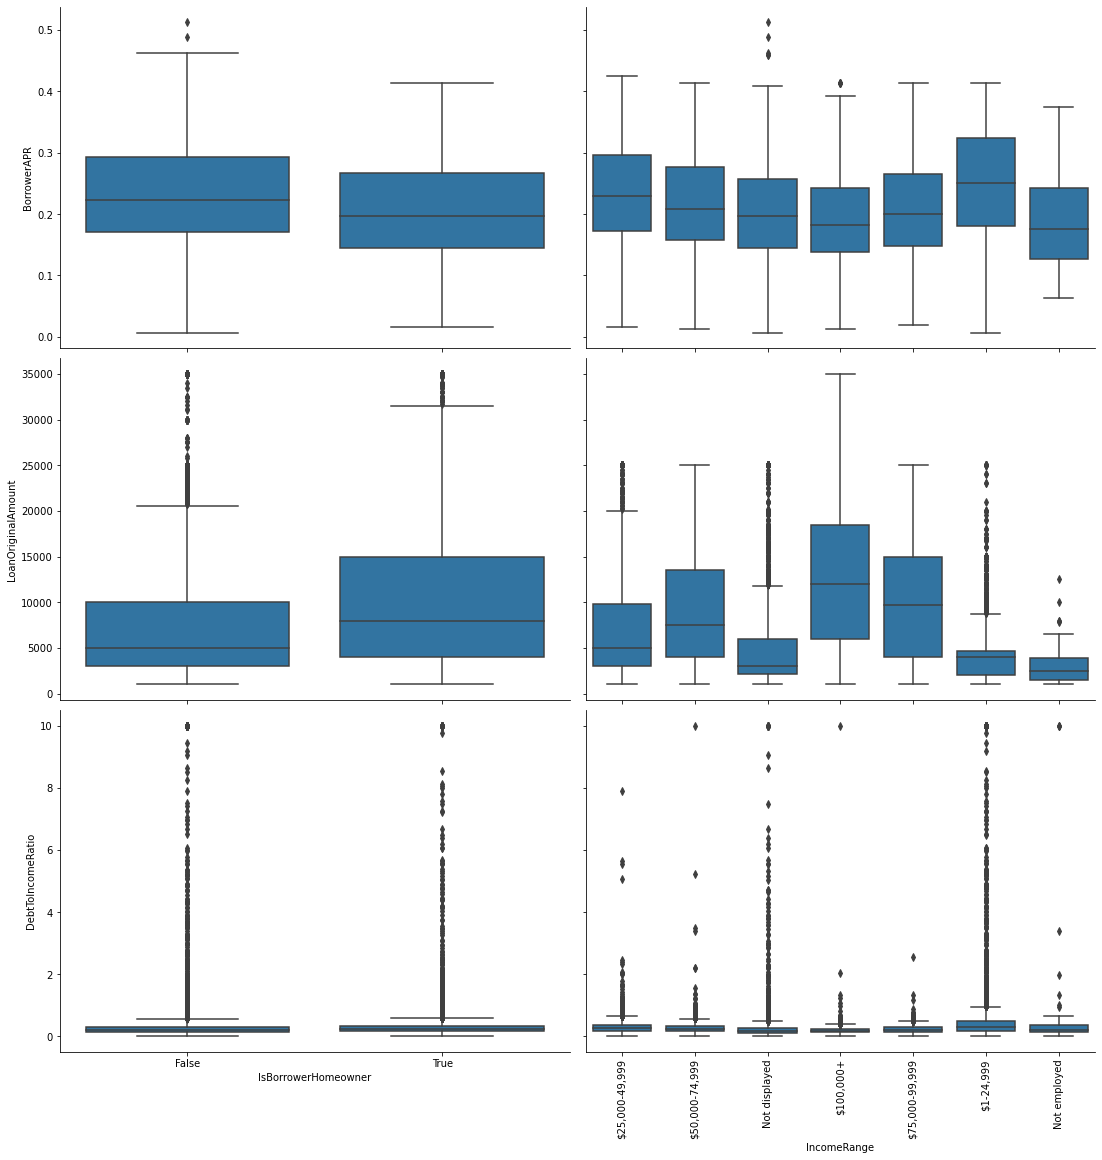

In [94]:
# plot 2  

plt.figure(figsize = [20, 10])
g = sb.PairGrid(data = df_loan, y_vars = n_loan_vars, x_vars = ['IsBorrowerHomeowner', 'IncomeRange'],
                height = 5, aspect = 1.5);

g.map(boxgrid)
plt.xticks(rotation = 90)
plt.show();

Borrowers who own home has higher original loan amount and APR is slightly lower. In terms of income range, if you have higher income range, your origianl loan amount tends to be highr as well. On the other hand, APR is lower if you have higher income.


Finally, let's look at relationships between the categorical features.

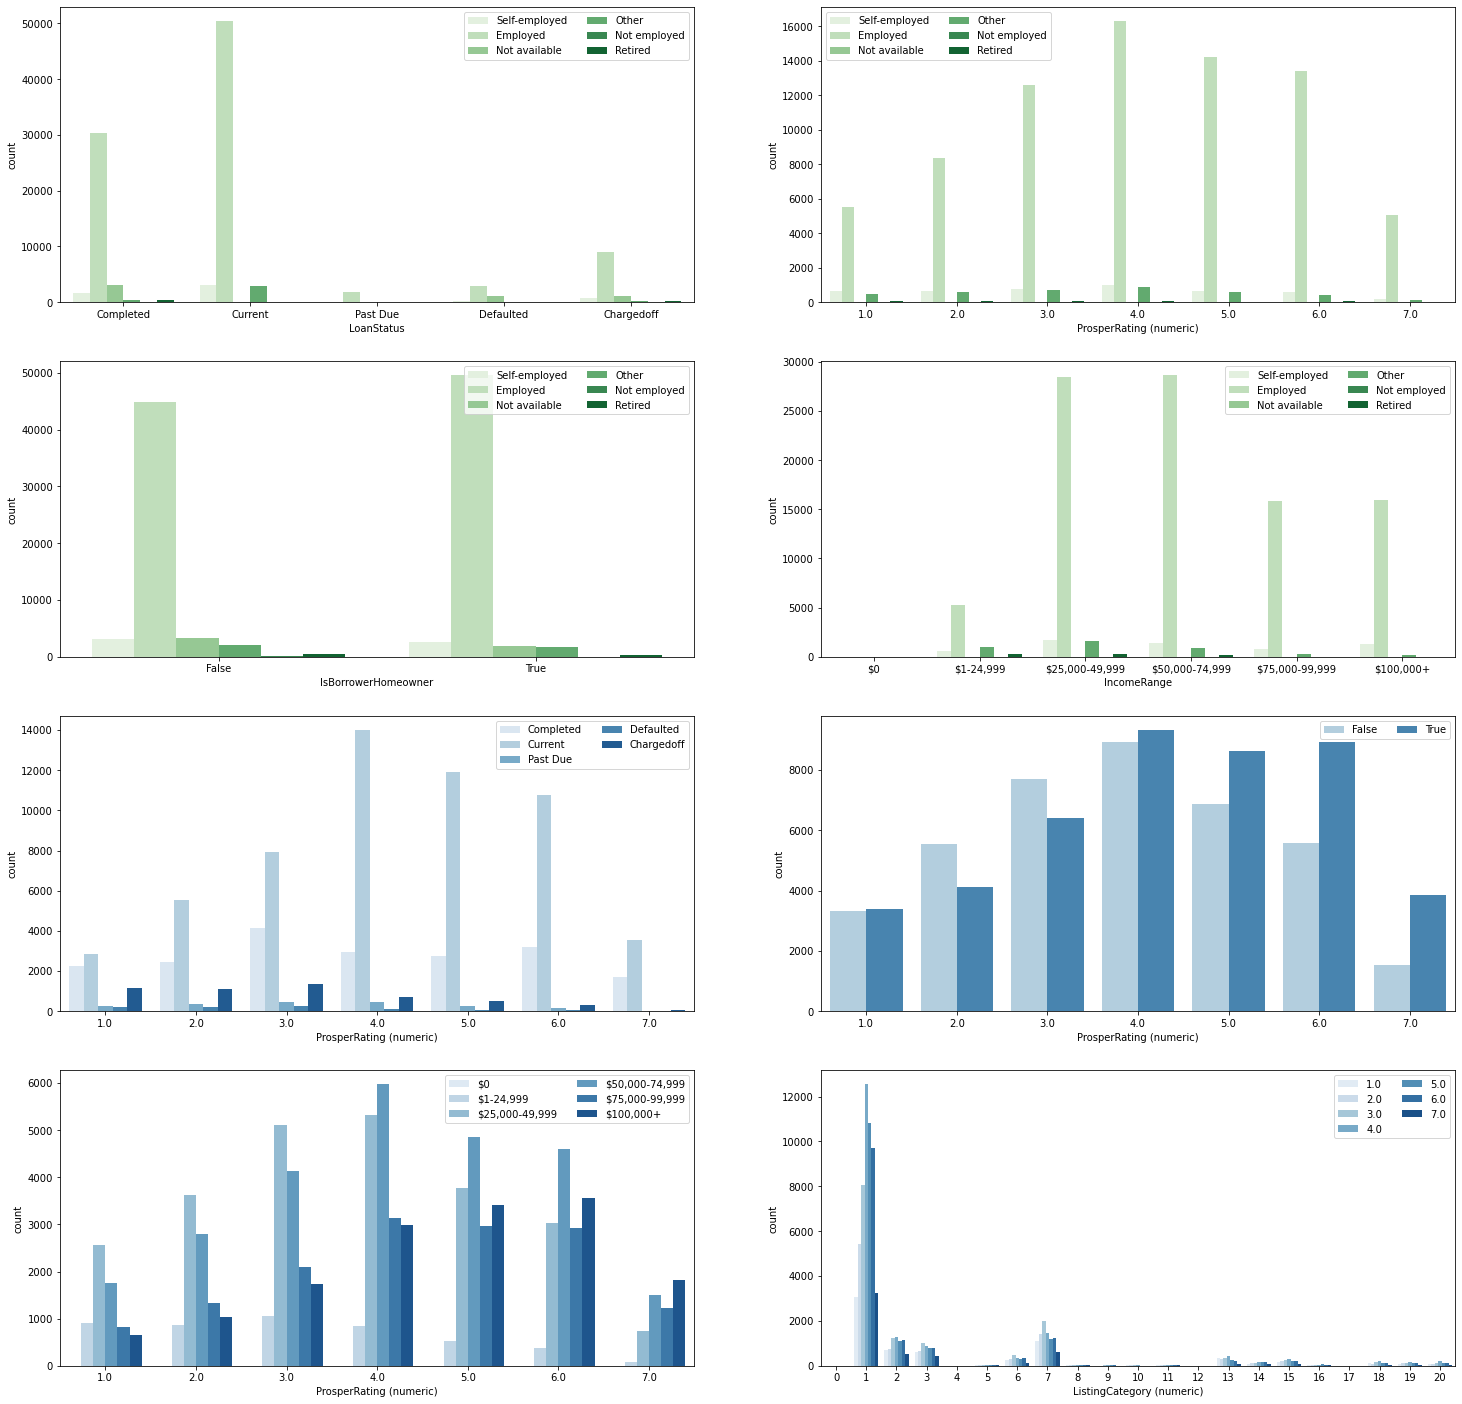

In [95]:
#I selected a few combination based on my interest.

plt.figure (figsize = [25,25])

#subplot 1 :EmploymentStatus vs LoanStatus 
ax = plt.subplot(4, 2, 1)
sb.countplot(data = df_loan, x = 'LoanStatus', hue = 'EmploymentStatus', palette = 'Greens')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping


#subplot 2 :EmploymentStatus vs ProsperRating (numeric)
ax = plt.subplot(4, 2, 2)
sb.countplot(data = df_loan, x = 'ProsperRating (numeric)', hue = 'EmploymentStatus', palette = 'Greens')
ax.legend(ncol = 2)

#subplot 3:EmploymentStatus vs  IsBorrowerHomeowner
ax = plt.subplot(4, 2, 3)
sb.countplot(data = df_loan, x = 'IsBorrowerHomeowner', hue = 'EmploymentStatus', palette = 'Greens')
ax.legend(ncol = 2)

#subplot 4 :EmploymentStatus vs  IncomeRange
ax = plt.subplot(4, 2, 4)
sb.countplot(data = df_loan, x = 'IncomeRange', hue = 'EmploymentStatus', palette = 'Greens', order = order_inc)
ax.legend(ncol = 2)

#subplot 5 :ProsperRating (numeric) vs  LoanStatus
ax = plt.subplot(4, 2, 5)
sb.countplot(data = df_loan, x = 'ProsperRating (numeric)', hue = 'LoanStatus', palette = 'Blues')
ax.legend(ncol = 2)

#subplot 6 :ProsperRating (numeric) vs  IsBorrowerHomeowner
ax = plt.subplot(4, 2, 6)
sb.countplot(data = df_loan, x = 'ProsperRating (numeric)', hue = 'IsBorrowerHomeowner', palette = 'Blues')
ax.legend(ncol = 2)

#subplot 7 :ProsperRating (numeric) vs  IncomeRange
ax = plt.subplot(4, 2, 7)
sb.countplot(data = df_loan, x = 'ProsperRating (numeric)', hue = 'IncomeRange', palette = 'Blues', hue_order = order_inc)
ax.legend(ncol = 2)

#subplot 8 :ProsperRating (numeric) vs ListingCategory (numeric) 
ax = plt.subplot(4, 2, 8)
sb.countplot(data = df_loan, x = 'ListingCategory (numeric)', hue = 'ProsperRating (numeric)', palette = 'Blues')
ax.legend(ncol = 2)


Employment status has interaction with loan status. It looks there are less employed people in case of Defaulted and Charged off.
In terms of prosper rating and employment status, there are less not-employed people in Prosper rating of 6 and 7.
There is not much interaction between home ownership and employment status.
There is week interaction between income range and employment status. there is less not employed people in income range of over $75,000.

There is strong interaction between Prosper rating and loan status. Higher ratings has much less defaulted and charged off.

For prosper rating and home ownership shows strong interaction. 
Higher ratings has more people owning homes.
Also, Prosper rating and income range has strong interaction.
While, there are people who has $ 100,000+ income but rating is 1, there are much less people with rating 7, whose income is lower than $49,999.
Listing category and rating has little interaction.


With the preliminary look at bivariate relationships out of the way, I want to dig into some of the relationships with APR rate.

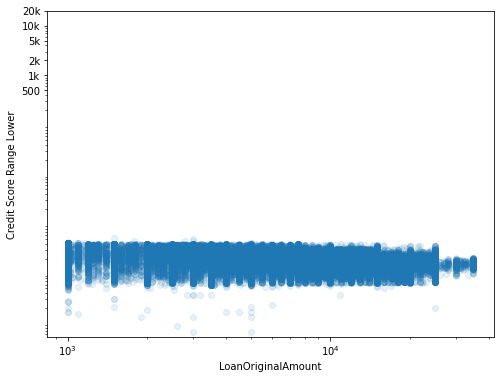

In [384]:
# scatter plot of APR rate vs. carat, with log transform on price axis

plt.figure(figsize = [8, 6])
plt.scatter(data = df_loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR', alpha = 1/10)
plt.xlabel('LoanOriginalAmount')
plt.xscale('log')
plt.yscale('log')
plt.yticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('Credit Score Range Lower')
plt.show()

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!